In [ ]:
!pip install pyrsgis
!pip install geopandas 
!pip install rasterio

In [ ]:
import numpy as np
import rasterio
import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
os.chdir('/content/drive/MyDrive/MyinGyan_corn')

In [ ]:
#src=  rasterio.open('ndvi_training_datacube.tif') #ndvi data cube
src = rasterio.open('/content/drive/MyDrive/MyinGyan_corn/evi_data_cube.tif')


In [ ]:
# Magic code - this piece if code simply creates an exact copy of our input dataset and saves it in memory file. 
# There should be no reason to do this but this step increases the speed of the trainnig data extraction 
# from 2 hrs without it to 10 sec with creating the copy.
img = src.read()   # load our original input file bands to a numby array stack
img = np.nan_to_num(img)
print(img.shape)
profile = src.profile  # the copy the profile of the original GeoTIFF input file
with rasterio.io.MemoryFile() as memfile:
    with memfile.open(**profile) as dst:
        for i in range(0, src.count):
            dst.write(img[i], i+1)
    dataset = memfile.open()





(34, 1960, 2335)


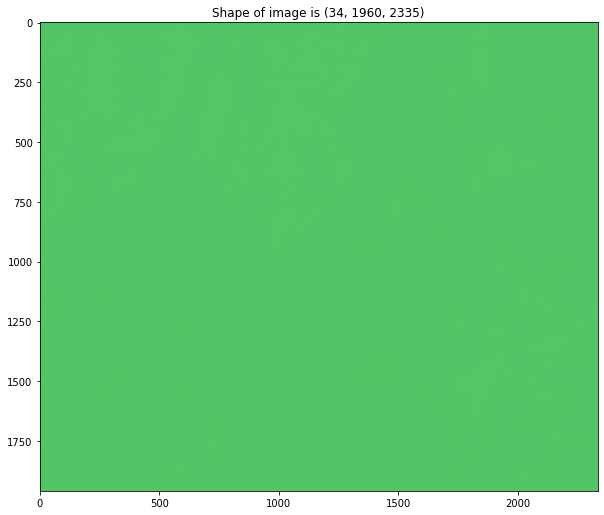

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img[1])
plt.title(label=f'Shape of image is {img.shape}');

In [ ]:
bands = list(src.descriptions)
print(bands)

['EVI', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6', 'EVI_7', 'EVI_8', 'EVI_9', 'EVI_10', 'EVI_11', 'EVI_12', 'EVI_13', 'EVI_14', 'EVI_15', 'EVI_16', 'EVI_17', 'EVI_18', 'EVI_19', 'EVI_20', 'EVI_21', 'EVI_22', 'EVI_23', 'EVI_24', 'EVI_25', 'EVI_26', 'EVI_27', 'EVI_28', 'EVI_29', 'EVI_30', 'EVI_31', 'EVI_32', 'EVI_33']


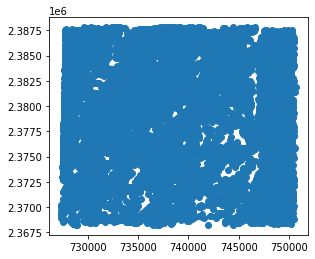

In [ ]:
train_pts = gpd.read_file('/content/drive/MyDrive/MyinGyan_corn/Myingyan_16000_dataset.shp')
train_pts.plot()

In [ ]:
train_pts.head()

,value,UTM_N,UTM_E,geometry
0,0,2374630.0,735916.0,POINT (735915.941 2374626.380)
1,0,2376500.0,736610.0,POINT (736609.615 2376497.125)
2,0,2380900.0,740363.0,POINT (740363.072 2380901.704)
3,0,2371140.0,736742.0,POINT (736741.601 2371135.848)
4,0,2376460.0,736003.0,POINT (736003.342 2376459.939)


In [ ]:
# %%time
# Read points from shapefile
train_pts = gpd.read_file('/content/drive/MyDrive/MyinGyan_corn/Myingyan_16000_dataset.shp') 
#train_pts=train_pts.rename(columns={'GRID_CODE':'GRIDCODE'},inplace=True)

train_pts = train_pts[['value', 'UTM_E', 'UTM_N', 'geometry']]  # These are the attributes in our point dataset
train_pts.index = range(len(train_pts))
coords = [(x,y) for x, y in zip(train_pts.UTM_E, train_pts.UTM_N)]  # Create list of point coordinates

# Sample the each band of raster dataset at each point in the coordinate list
train_pts['Raster Value'] = [x for x in dataset.sample(coords)]   # all band values are saved as a list in the Raster Value column 
# Unpack the Raster Value column to separate column for each band - band names were retrieved with snappy and are now usef as column names
train_pts[bands] = pd.DataFrame(train_pts['Raster Value'].tolist(), index= train_pts.index)  
train_pts = train_pts.drop(['Raster Value'], axis=1)  # Remove Raster Value column
train_pts.to_csv('/content/drive/MyDrive/MyinGyan_corn/EVI training data Myingyan 16000.csv') # save our training dataset to CSV
train_pts.head() # visualize the first rows of the dataframe 

,value,UTM_E,UTM_N,geometry,EVI,EVI_1,EVI_2,EVI_3,EVI_4,EVI_5,...,EVI_24,EVI_25,EVI_26,EVI_27,EVI_28,EVI_29,EVI_30,EVI_31,EVI_32,EVI_33
0,0,735916.0,2374630.0,POINT (735915.941 2374626.380),-0.064804,0.003261,-0.071994,-0.103332,-0.116060,-0.116057,...,-0.100595,-0.092957,-0.066860,0.000000,-0.068562,-0.071304,-0.102019,-0.112251,-0.161552,-0.130922
1,0,736610.0,2376500.0,POINT (736609.615 2376497.125),-0.143990,-0.100967,-0.120024,-0.141599,-0.155674,-0.135716,...,-0.076318,-0.066439,-0.045413,-0.061807,-0.061911,-0.075483,-0.146782,-0.123427,-0.109153,-0.107935
2,0,740363.0,2380900.0,POINT (740363.072 2380901.704),-0.144274,-0.126580,-0.111816,-0.137272,-0.140102,-0.128288,...,-0.077203,-0.075690,-0.052108,-0.059904,-0.059401,-0.078225,-0.146811,-0.130589,-0.118355,-0.097519
3,0,736742.0,2371140.0,POINT (736741.601 2371135.848),-0.120687,-0.012950,-0.109114,-0.137251,-0.144060,-0.137556,...,-0.082133,-0.076630,-0.061805,0.000000,-0.074531,-0.080080,-0.155030,-0.134873,-0.129524,-0.119620
4,0,736003.0,2376460.0,POINT (736003.342 2376459.939),0.184612,0.132435,0.162885,0.198250,0.199294,0.183633,...,0.148602,0.140798,0.127129,0.134968,0.136493,0.126704,0.138211,0.129321,0.126400,0.138461


In [ ]:
train_pts.loc[train_pts['value']==1]

,value,UTM_E,UTM_N,geometry,EVI,EVI_1,EVI_2,EVI_3,EVI_4,EVI_5,...,EVI_24,EVI_25,EVI_26,EVI_27,EVI_28,EVI_29,EVI_30,EVI_31,EVI_32,EVI_33
8000,1,732393.0,2387810.0,POINT (732393.000 2387813.731),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8001,1,740023.0,2387810.0,POINT (740023.000 2387810.190),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8002,1,729673.0,2387800.0,POINT (729673.000 2387803.000),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8003,1,730348.0,2387800.0,POINT (730348.000 2387803.000),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8004,1,731878.0,2387800.0,POINT (731878.000 2387803.000),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15961,1,736848.0,2368220.0,POINT (736848.000 2368222.651),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
15962,1,736994.0,2368240.0,POINT (736994.199 2368238.947),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
15963,1,737601.0,2368370.0,POINT (737600.690 2368372.139),0.063495,0.132239,0.109706,0.295741,0.299392,0.314271,...,0.293681,0.201153,0.171182,0.0,0.181398,0.176793,0.134458,0.127657,0.064967,0.08379
15964,1,741913.0,2368240.0,POINT (741913.000 2368238.000),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [ ]:
# Creating training Dataset
x = []
x.append(train_pts[bands].values)

# Creating Label Dataset
y = train_pts['value'].values

print(len(x))
print(len(y))

1
15966


(34, 15966)


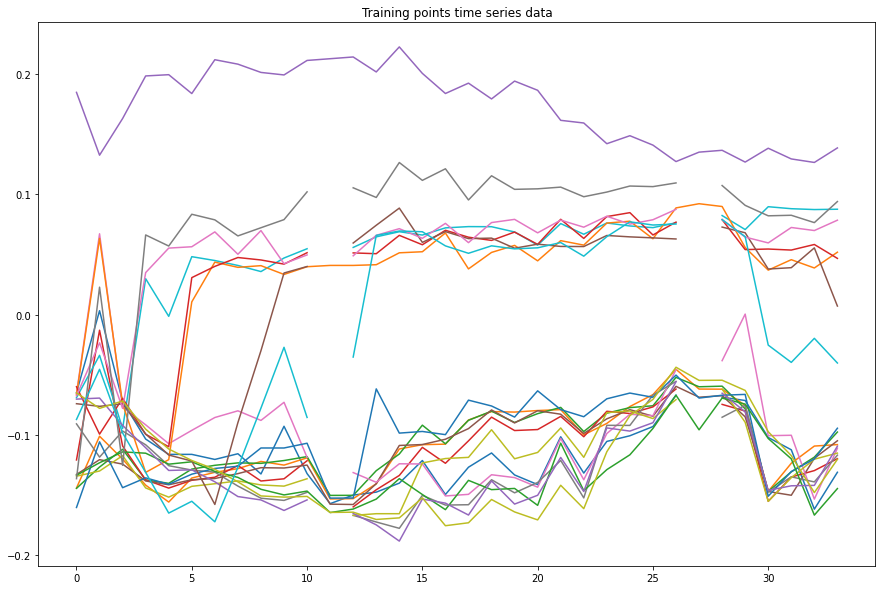

In [ ]:
# Plotting out training dataset
x_t = np.transpose(np.squeeze(np.asarray(x)))
print(x_t.shape)
plt.figure(figsize=(15,10))
plt.plot(x_t[:,:20]);
plt.title('Training points time series data');


In [ ]:
h

array([8000, 7966])